In [269]:
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import math
from IPython.display import clear_output
import warnings
import time
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
#%matplotlib notebook
pd.options.mode.chained_assignment = None
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import cProfile
import pstats
import io
from pstats import SortKey
import random
import pandas_ta as ta
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from itertools import product

In [266]:
nifty5 = pd.read_csv('CLEANED_NEW_NIFTY_50_5_MIN')
nifty5['EMA']=nifty5['Close'].ewm(span=5, adjust=False).mean()
nifty5 = nifty5.assign(**{'pivot': 0, 'bc': 0, 'tc': 0, 'r1': 0, 'r2': 0, 'r3': 0, 's1': 0, 's2': 0, 's3': 0})
for i in nifty5[::75].index:
    if i>0:
        high = max(nifty5['High'][i-75:i-1])
        low = min(nifty5['Low'][i-75:i-1])
        close = nifty5['Close'][i-1]
        pivot = (high + low + close)/3.0
        bc = (high + low)/2.0
        tc = 2*pivot - bc
        nifty5['pivot'][i:i+75] = pivot
        nifty5['bc'][i:i+75] = min(bc,tc)
        nifty5['tc'][i:i+75] = max(bc,tc)
        nifty5['r1'][i:i+75] = 2*pivot - low
        nifty5['r2'][i:i+75] = pivot + high - low
        nifty5['r3'][i:i+75] = 2*pivot - low + high - low
        nifty5['s1'][i:i+75] = 2*pivot - high
        nifty5['s2'][i:i+75] = pivot - high + low
        nifty5['s3'][i:i+75] = 2*pivot - high - high + low

In [267]:
nifty5[::75]

,Date,Open,High,Low,Close,EMA,pivot,bc,tc,r1,r2,r3,s1,s2,s3
0,2015-01-09 09:15:00,8285.45,8301.30,8285.45,8301.20,8301.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75,2015-01-12 09:15:00,8291.35,8291.35,8245.60,8267.60,8276.222896,8258.116667,8247.050000,8269.183333,8325.133333,8370.016667,8437.033333,8213.233333,8146.216667,8101.333333
150,2015-01-13 09:15:00,8346.15,8355.90,8338.50,8340.80,8329.861772,8300.850000,8288.000000,8313.700000,8356.100000,8385.650000,8440.900000,8271.300000,8216.050000,8186.500000
225,2015-01-14 09:15:00,8307.25,8314.15,8286.85,8304.85,8303.250998,8309.533333,8306.666667,8312.400000,8350.916667,8398.033333,8439.416667,8262.416667,8221.033333,8173.916667
300,2015-01-15 09:15:00,8425.20,8452.65,8380.75,8429.30,8330.512770,8283.600000,8281.525000,8285.675000,8330.450000,8373.150000,8420.000000,8240.900000,8194.050000,8151.350000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183750,2025-02-03 09:15:00,23319.35,23345.15,23246.55,23263.00,23411.676402,23482.016667,23475.375000,23488.658333,23645.733333,23796.166667,23959.883333,23331.583333,23167.866667,23017.433333
183825,2025-02-04 09:15:00,23509.90,23514.35,23479.45,23502.70,23406.793643,23321.100000,23301.800000,23340.400000,23420.200000,23480.700000,23579.800000,23260.600000,23161.500000,23101.000000
183900,2025-02-05 09:15:00,23801.75,23807.30,23760.90,23769.25,23739.679302,23631.200000,23592.950000,23669.450000,23839.250000,23970.800000,24178.850000,23499.650000,23291.600000,23160.050000
183975,2025-02-06 09:15:00,23761.95,23773.55,23712.15,23727.40,23707.319748,23724.833333,23705.791667,23743.875000,23769.216667,23851.683333,23896.066667,23642.366667,23597.983333,23515.516667


298


<Figure size 7680x5760 with 0 Axes>

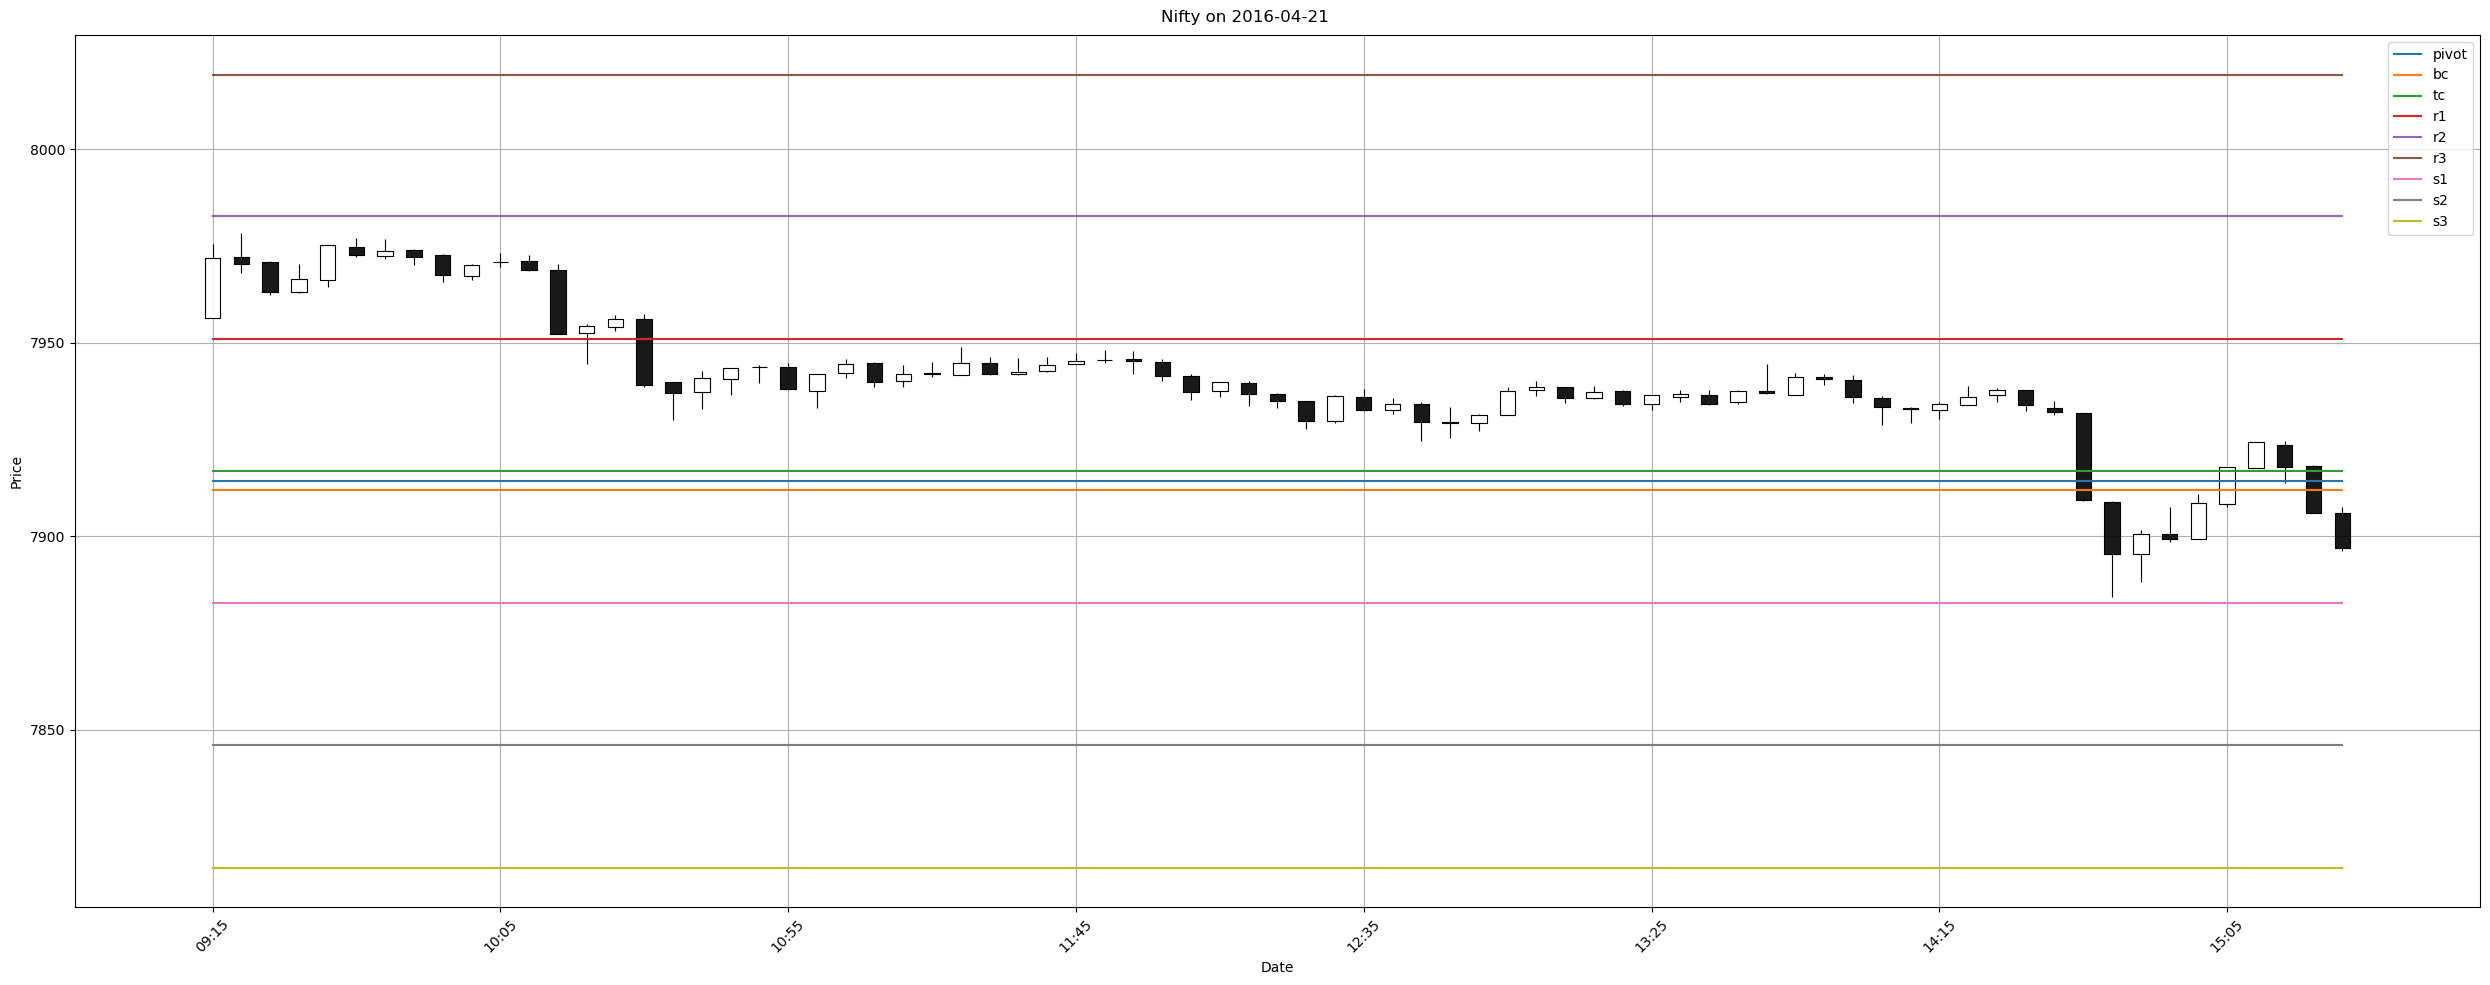

In [268]:
tl=75
f=1
a=random.randint(1, 2455)
#a=989
#a=int(nifty5[nifty5['Date']=='14-11-2018'].index[0]/tl)
b=a+1
plotnifty=nifty5.iloc[a*tl:b*tl:f, :]
plotnifty.index= pd.to_datetime(plotnifty['Date'])#+' '+plotnifty['Time'],format='%d-%m-%Y %H:%M')
plotnifty.drop('Date',axis=1,inplace=True)

#Creating Subplots
plt.figure(dpi=1200)
fig, ax = plt.subplots(figsize=(25,10))
mc = mpf.make_marketcolors(up='w',down='k')
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(plotnifty[:], type='candle',style=s,ax=ax)
#plt.plot(plotnifty['EMA'].values,'k',label='EMA')
plt.plot(plotnifty[['pivot','bc','tc','r1','r2','r3','s1','s2','s3']].values, label = ['pivot','bc','tc','r1','r2','r3','s1','s2','s3'])
#plt.plot(plotnifty[['pivot','bc','tc','r1','r2','s1','s2']].values, label = ['pivot','bc','tc','r1','r2','s1','s2'])
# plt.plot(c1['BoughtAt'][a*tl:b*tl:f].values,'g^',markersize=10)
# plt.plot(c1['SoldAt'][a*tl:b*tl:f].values,'rv',markersize=10)

# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Nifty on '+str(nifty5.iloc[a*tl:b*tl:f, :]['Date'].iat[-1][:10]))
fig.tight_layout()
plt.grid()
plt.legend()
print(a)

In [273]:
c2 = []

c1 = pd.DataFrame(columns=['Date','Balance','BoughtAt','SoldAt','Profloss', 'Proflossperc'])
c1['Date'] = nifty5['Date']
c1['BoughtAt'] = 0
c1['SoldAt'] = 0
c1['Profloss'] = 0
c1['Proflossperc'] = 0

Date_arr = nifty5['Date'].values
Open_arr = nifty5['Open'].values
Close_arr = nifty5['Close'].values
Low_arr = nifty5['Low'].values
High_arr = nifty5['High'].values
bc_arr = nifty5['bc'].values
tc_arr = nifty5['tc'].values
maxvals = np.maximum(nifty5['Open'].values,nifty5['Close'].values)

tl = 75
pn = ln = 0
a, b = 1, 2455
slip = 1.0 / 100
leverage = 15
   
def sell(i, j, tgt, sl, slp,n):
    global pn, ln, slip, leverage, Close_arr, High_arr
    base = i * tl
    for k in range(j, tl):
        idx = base + k
        c = Close_arr[idx]
        low = Low_arr[idx]
        if c > sl:
            ln += 1
            c1.iat[idx, c1.columns.get_loc('BoughtAt')]  = c
            c1.iat[idx, c1.columns.get_loc('Profloss')] = n*(slp - c)*leverage - slp*slip*n
            return k
        if low < tgt:
            pn += 1
            c1.iat[idx, c1.columns.get_loc('BoughtAt')]  = tgt
            c1.iat[idx, c1.columns.get_loc('Profloss')] = n*(slp - tgt)*leverage - slp*slip*n
            return k
    # if no exit triggered
    idx = base + (tl-1)
    final_c = Close_arr[idx]
    c1.iat[idx, c1.columns.get_loc('BoughtAt')]  = final_c
    c1.iat[idx, c1.columns.get_loc('Profloss')] = n*(slp - final_c)*leverage - slp*slip*n
    if final_c < slp: 
        pn += 1
    else:          
        ln += 1
    return (tl-1)

def buy(i, j, tgt, sl, byp,n):
    global pn, ln, slip, leverage, Close_arr, High_arr
    base = i * tl
    for k in range(j, tl):
        idx = base + k
        c = Close_arr[idx]
        h = High_arr[idx]
        if c < sl:
            ln += 1
            c1.iat[idx, c1.columns.get_loc('SoldAt')]  = c
            c1.iat[idx, c1.columns.get_loc('Profloss')] = n*(c - byp)*leverage - byp*slip*n
            return k
        if h > tgt:
            pn += 1
            c1.iat[idx, c1.columns.get_loc('SoldAt')]  = tgt
            c1.iat[idx, c1.columns.get_loc('Profloss')] = n*(tgt - byp)*leverage - byp*slip*n
            return k
    idx = base + (tl-1)
    final_c = Close_arr[idx]
    c1.iat[idx, c1.columns.get_loc('SoldAt')]  = final_c
    c1.iat[idx, c1.columns.get_loc('Profloss')] = n*(final_c - byp)*leverage - byp*slip*n
    if final_c > byp: 
        pn += 1
    else:             
        ln += 1
    return tl-1
    
def backtest(c1,a,b,tl,balance,Open_arr,Close_arr,nifty5,proftolossratio,breakout_threshold,breakout_size_threshold,lower_consolidation_threshold,upper_consolidation_threshold,maxvals,maxvals_rolling_avg):
    for i in range(a,b):
        k=0
        base = i * tl
        n = balance / Open_arr[base]
        soldflag=0
        
        if n <= 0:
            print(c1.loc[i*tl+j,'Date'])
            c1['Balance'] = c1['Balance'].fillna(0)
            print('Total Loss 1')
            return
    
        if i > a:
            c1.iat[base, c1.columns.get_loc('Balance')] = c1.iat[base - 1, c1.columns.get_loc('Balance')]
            
        for j in range(tl):
            idx = base + j
            
            if soldflag == 1:
                if j <= k:
                    continue
                else:
                    soldflag = 0
                    
            if j > 0 and soldflag == 0:
                c1.iat[idx, c1.columns.get_loc('Balance')] = c1.iat[idx - 1, c1.columns.get_loc('Balance')]
                
            open_price = Open_arr[idx]
            close_price = Close_arr[idx]
            pivots = nifty5.loc[base, 'pivot':'s3'].values.tolist()
            pivots += [close_price]
            pivots.sort()
            ind = np.searchsorted(pivots, close_price)
    
            if 6 < j < (tl-10) and 1 <= ind < (len(pivots)-1):
                if close_price > breakout_threshold * pivots[ind-1] and (close_price - open_price) > breakout_size_threshold * close_price:
                    #if np.all((maxvals[idx-4:idx] <= (1+upper_consolidation_threshold)*pivots[ind-1]) & (maxvals[idx-4:idx] >= (1-lower_consolidation_threshold)*pivots[ind-1])):
                    if np.all((1-lower_consolidation_threshold)*pivots[ind-1] <= maxvals_rolling_avg[idx] <= (1+upper_consolidation_threshold)*pivots[ind-1]):
                        byp = close_price
                        sl  = pivots[ind-1]
                        tgt = pivots[ind+1]
                        if (tgt-byp)/(byp-sl) > proftolossratio:        
                            
                            c1.iat[idx, c1.columns.get_loc('BoughtAt')] = byp
                            k = buy(i, j, tgt, sl, byp,n)
                            trade_idx = base + k
                            
                            c1.loc[idx:trade_idx, 'Balance'] = c1.iat[idx, c1.columns.get_loc('Balance')]
                            c1.iat[trade_idx, c1.columns.get_loc('Balance')] += c1.iat[trade_idx, c1.columns.get_loc('Profloss')]
                            soldflag = 1
                            #print('ProfLoss: {:.2f}, Balance: {:.2f}'.format(c1.iat[trade_idx, c1.columns.get_loc('Profloss')],c1.iat[trade_idx, c1.columns.get_loc('Balance')]))
    
        balance = c1.iat[base + tl - 1, c1.columns.get_loc('Balance')]
        if balance <= 0:
            print(c1.loc[i*tl+j,'Date'])
            c1['Balance'] = c1['Balance'].fillna(0)
            print('Total Loss 2')
            return
    return


for proftolossratio in [2.0]:

    c1['Balance'] = 0
    c1['BoughtAt'] = 0
    c1['SoldAt'] = 0
    c1['Profloss'] = 0
    c1['Proflossperc'] = 0

    l=1

    upper_consolidation_threshold = 0.02 / 100 # 25000 -> 5
    lower_consolidation_threshold = 0.05 / 100  # 25000 -> 12.5
    breakout_threshold =            0.1 / 100  # 25000 -> 25
    breakout_size_threshold =       0.1 / 100  # 25000 -> 25
    
    upper_consolidation_threshold_array = np.arange(0.02, 0.12, 0.02)
    lower_consolidation_threshold_array = np.arange(0.02, 0.12, 0.02)
    breakout_threshold_array =            np.arange(0.05, 0.3, 0.05)
    breakout_size_threshold_array =       np.arange(0.05, 0.3, 0.05)
    
    for upper_consolidation_threshold, lower_consolidation_threshold, breakout_threshold, breakout_size_threshold in product(upper_consolidation_threshold_array, lower_consolidation_threshold_array, breakout_threshold_array, breakout_size_threshold_array):
        start_time = time.time()
        global pn,ln
        pn = ln = 0
        
        start_idx = a * tl
        c1.iat[start_idx, c1.columns.get_loc('Balance')] = round(10 * Open_arr[start_idx], -4)
        ini = balance = c1.iat[start_idx, c1.columns.get_loc('Balance')] 
        
        tgt=0.0
        sl=0.0
        
        maxvals_rolling_avg = np.concatenate(([np.nan]*(5-1), np.convolve(maxvals, np.ones(5)/5, mode='valid')))  # rolling mean with window=5

        backtest(c1,a,b,tl,balance,Open_arr,Close_arr,nifty5,proftolossratio,breakout_threshold,breakout_size_threshold,lower_consolidation_threshold,upper_consolidation_threshold,maxvals,maxvals_rolling_avg)
        
        res=(c1.iat[-1, c1.columns.get_loc('Balance')]-ini)/ini
        Roll_Max = c1['Balance'][a*tl:b*tl:tl].cummax()
        Daily_Drawdown = c1['Balance'][a*tl:b*tl:tl]/Roll_Max - 1.0
        Max_Daily_Drawdown = Daily_Drawdown.cummin()
        numberoftrades=(ln+pn)/(i-a)
        max_drawdown=100*min(np.array(Max_Daily_Drawdown))
        if (ln+pn)>0:
            pop=100*pn/(ln+pn)
        else:
            pop=0
        net_return=res*100
        if res>0:
            annual_return=100*(pow(10,math.log(1+res,10)/((b-a)/234))-1)
        else:
            annual_return=0
        c1['Profloss']=c1['Profloss'].fillna(0)
        c1['Proflossperc']=100*c1['Profloss']/c1['Balance']
        c1['Proflossperc'] = c1['Proflossperc'].fillna(0)
        # print('Risk to Reward Ratio chosen: {:.2f}'.format(proftolossratio))
        # print('Number of profits:{} and number of losses:{}'.format(pn,ln))
        # print('Max Drawdown: {:.2f}% , Probability of profit: {:.2f}% and Number of trades per day: {:.2f}'.format(max_drawdown,pop,numberoftrades))
        # print('Net return: {:.2f}%, annualized: {:.2f}%'.format(net_return,annual_return))
        # print('Mean profit: {:.2f}%'.format(c1[c1['Proflossperc']>0]['Proflossperc'].mean()))
        # print('Mean loss: {:.2f}%'.format(c1[c1['Proflossperc']<0]['Proflossperc'].mean()))
        # print('Net profit/loss per trade: {:.2f}%\n\n'.format(c1[c1['Proflossperc']>0]['Proflossperc'].mean()*pop/100+c1[c1['Proflossperc']<0]['Proflossperc'].mean()*(100-pop)/100))
        print('{}th Iteration Done in {:.2f}s'.format(l,time.time()-start_time))
        l += 1
        c2.append(c1)

1th Iteration Done in 42.50s
2th Iteration Done in 43.06s
3th Iteration Done in 42.92s


KeyboardInterrupt: 

<Figure size 7680x5760 with 0 Axes>

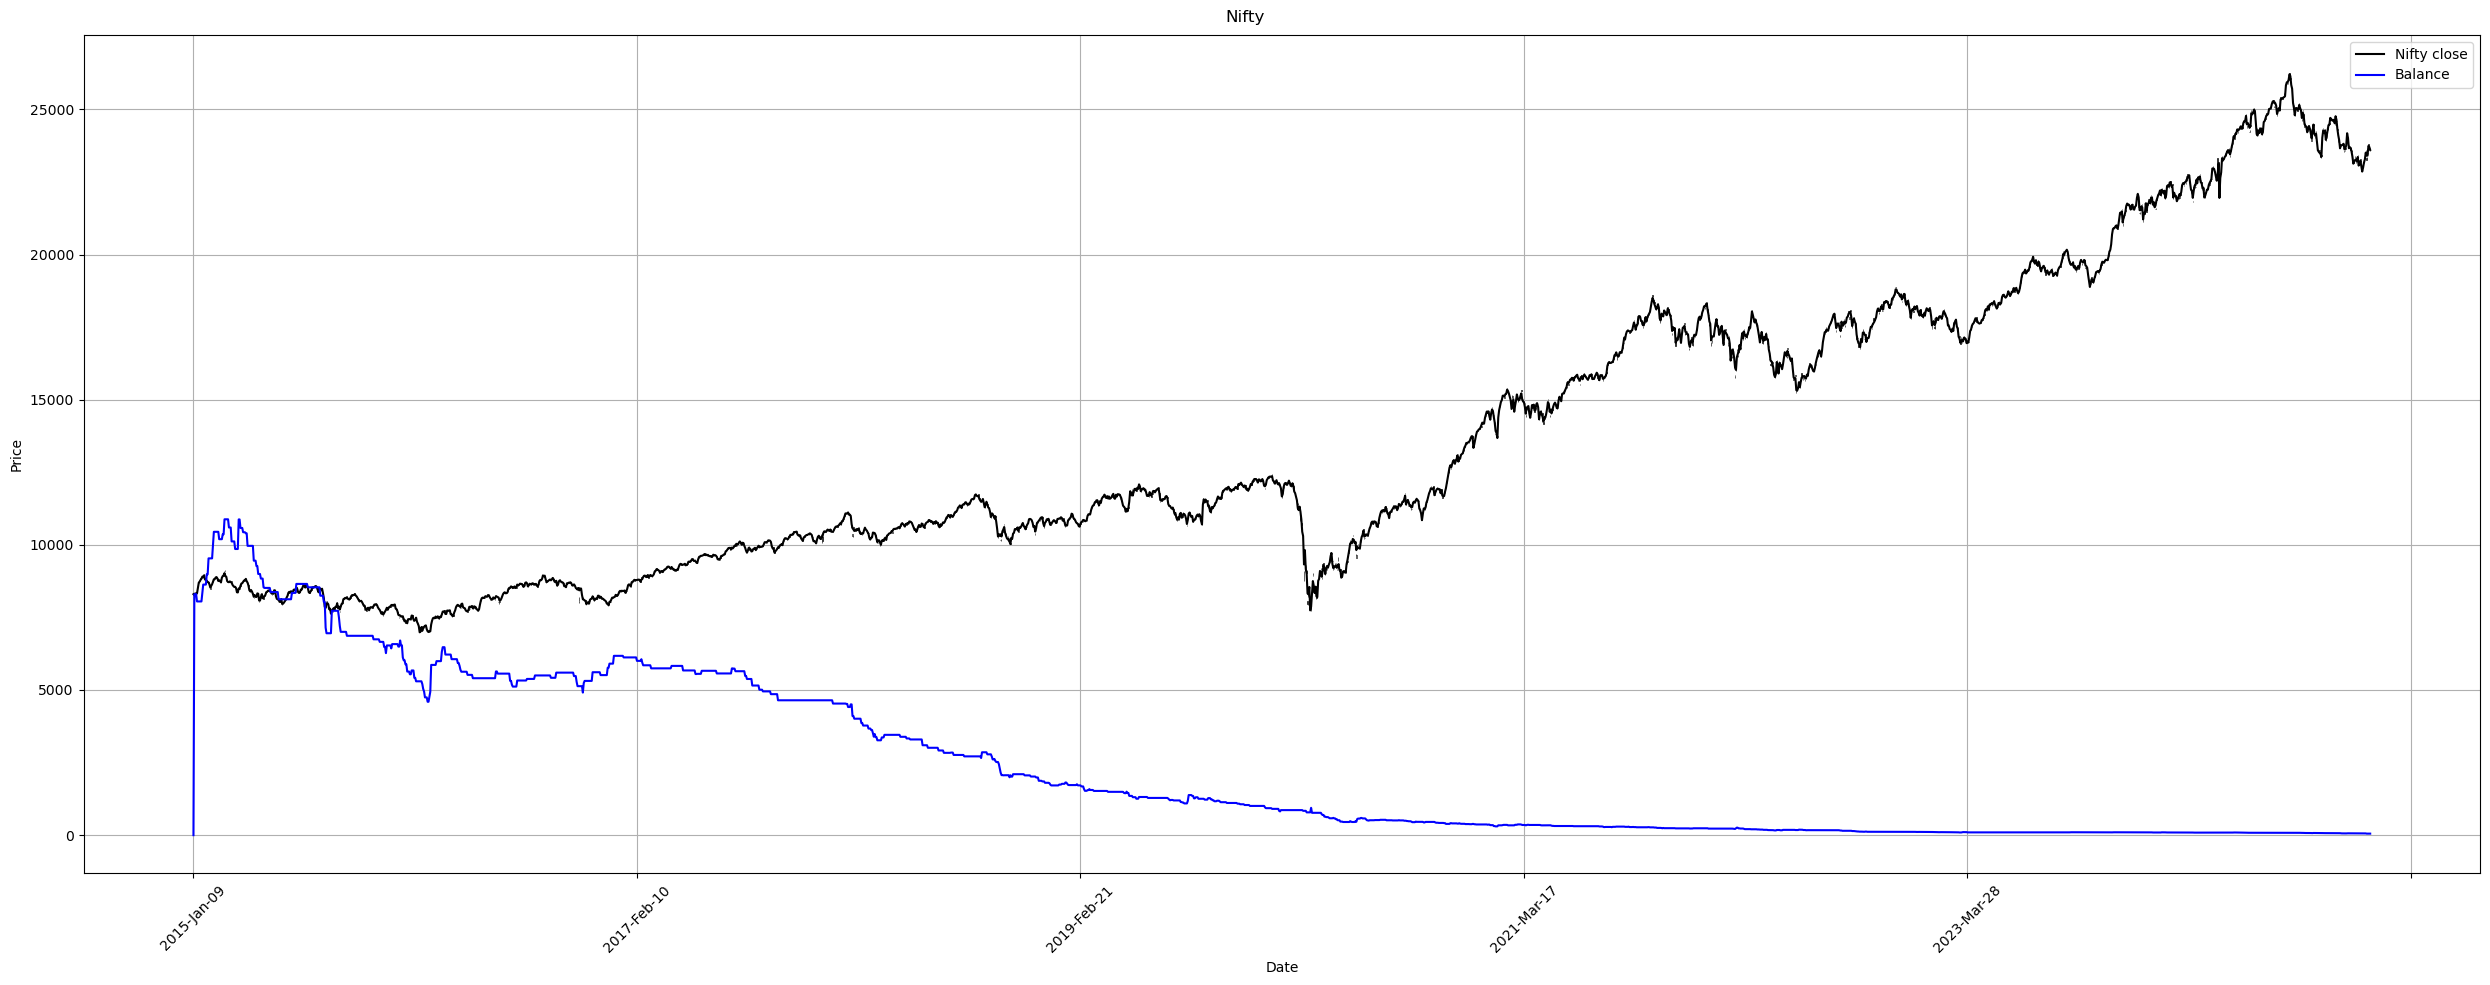

In [265]:
f=75
plotnifty=nifty5[0*tl:2455*tl:f]
plotnifty.index= pd.to_datetime(plotnifty['Date'])
plotnifty.drop('Date',axis=1,inplace=True)
#plotnifty.drop('Time',axis=1,inplace=True)
plotbal=c1['Balance'][0*tl:2455*tl:f]
fact=plotbal.iloc[1]/plotnifty['EMA'].iloc[0]
plotbal=plotbal/fact
#Creating Subplots
plt.figure(dpi=1200)
fig, ax = plt.subplots(figsize=(25,10))
mc = mpf.make_marketcolors(up='w',down='k')
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(plotnifty[:], type='candle',style=s,ax=ax,warn_too_much_data=2000)
plt.plot(plotnifty['EMA'].values,'k',label='Nifty close')
plt.plot(plotbal.values,'b',label='Balance')
#plt.plot(np.divide(c1['Balance'][a*tl:b*tl:f].values[1:], np.diff(c1['Balance'][a*tl:b*tl:f])) ,'r',label='ratio')
#plt.plot(np.diff(c1['Balance'][a*tl:b*tl:f]) ,'g',label='differential')
# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
#fig.suptitle('Daily Candlestick Chart of nifty')
fig.suptitle('Nifty')
fig.tight_layout()
plt.grid()
plt.legend()
#plt.savefig(nifty5.iloc[a*tl:b*tl:f, :]['Date'].iat[-1])

1982


<Figure size 7680x5760 with 0 Axes>

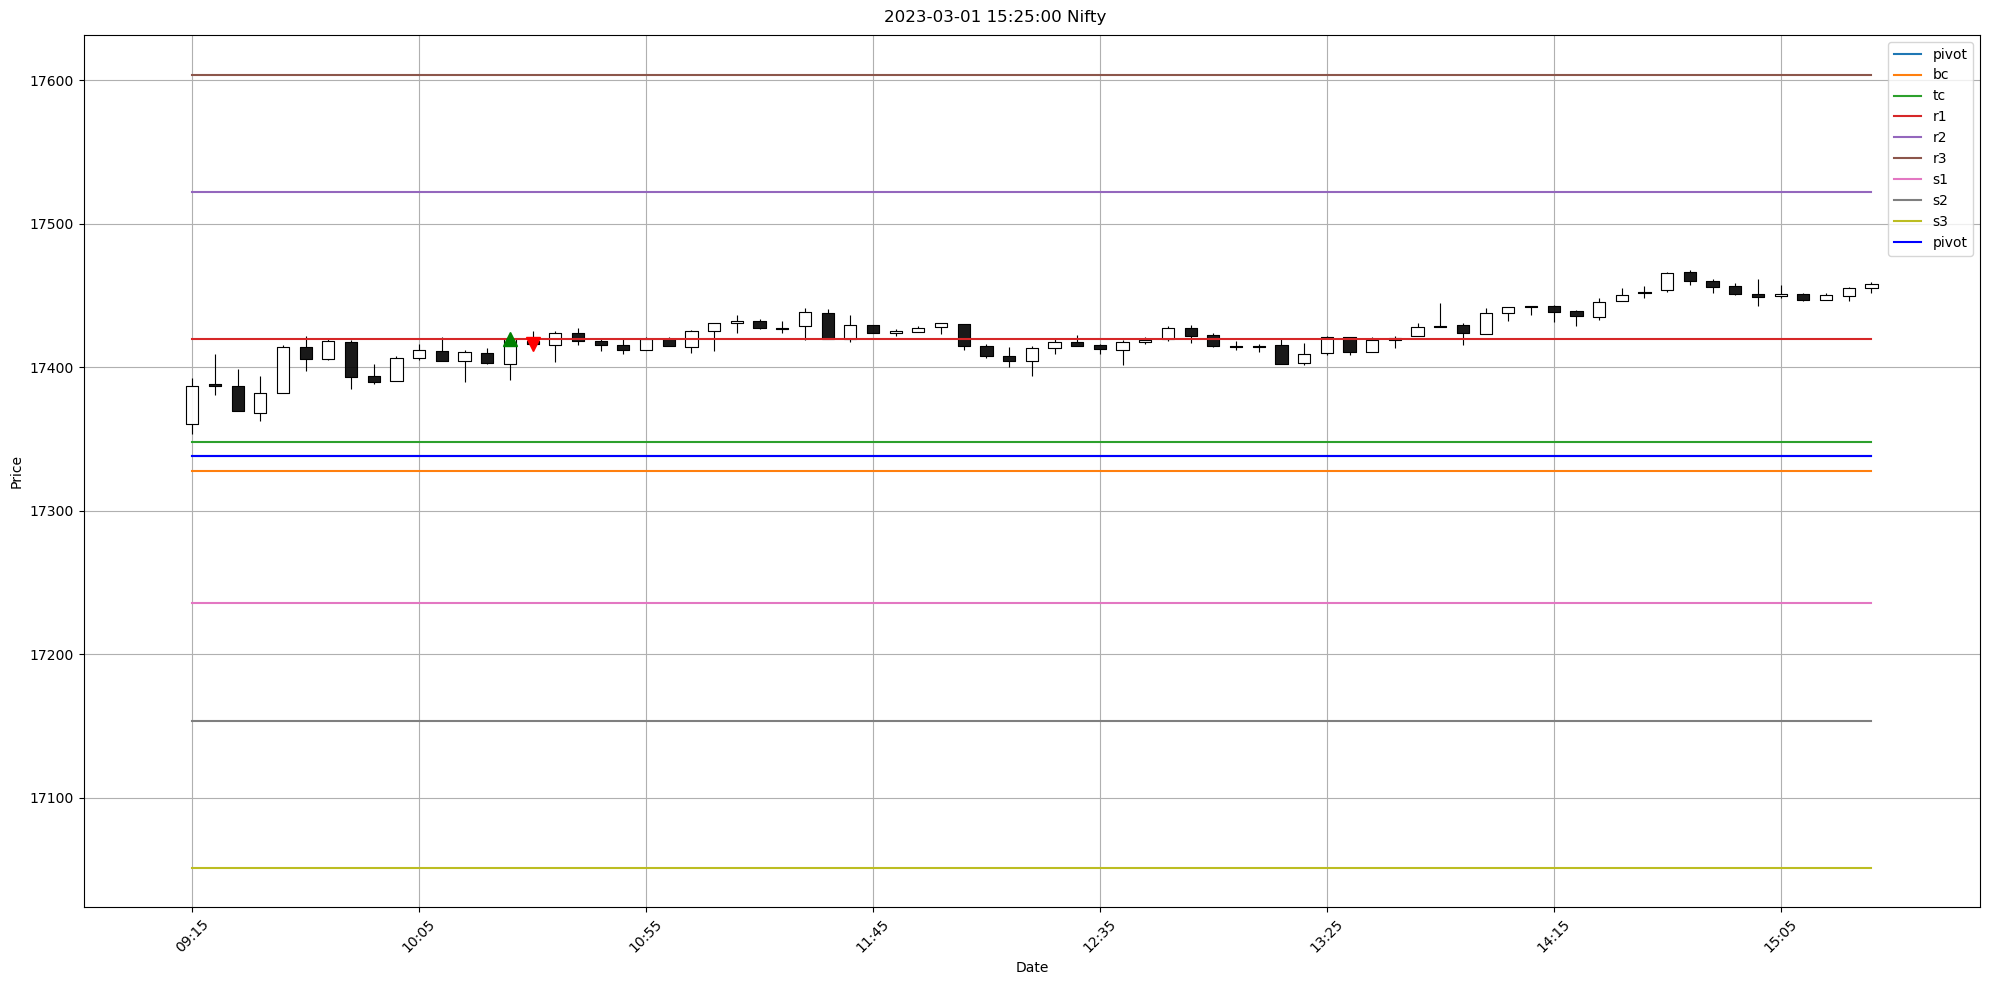

In [220]:
trading_days = list(c1[(~np.isnan(c1['SoldAt']))]['Date'])
day=random.randint(0, len(trading_days)-1)
f=1
a=int(nifty5[nifty5['Date']==trading_days[day]].index[0]/tl)
#a=int(c1[c1['Date']=='16-01-2020'].index[0]/tl)
b=a+1
plotnifty=nifty5.iloc[a*tl:b*tl:f, :]
plotnifty.index= pd.to_datetime(plotnifty['Date'])
plotnifty.drop('Date',axis=1,inplace=True)
buytr = np.array(c1['BoughtAt'])
selltr = np.array(c1['SoldAt'])
buytr[ buytr==0 ] = np.nan
selltr[ selltr==0 ] = np.nan
c1['BoughtAt'] = buytr 
c1['SoldAt'] = selltr

#Creating Subplots
plt.figure(dpi=1200)
fig, ax = plt.subplots(figsize=(20,10))
mc = mpf.make_marketcolors(up='w',down='k')
s  = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(plotnifty[:], type='candle',style=s,ax=ax,warn_too_much_data=2000)
plt.plot(plotnifty[['pivot','bc','tc','r1','r2','r3','s1','s2','s3']].values, label = ['pivot','bc','tc','r1','r2','r3','s1','s2','s3'])
#plt.plot(plotnifty[['pivot','bc','tc','r1','r2','s1','s2']].values, label = ['pivot','bc','tc','r1','r2','s1','s2'])
plt.plot(plotnifty['pivot'].values,'blue',label='pivot')
plt.plot(c1['BoughtAt'][a*tl:b*tl:f].values,'g^',markersize=10)
plt.plot(c1['SoldAt'][a*tl:b*tl:f].values,'rv',markersize=10)
# Setting labels & titles
ax.set_xlabel('Date')
ax.set_ylabel('Price')
#fig.suptitle('Daily Candlestick Chart of nifty')
fig.suptitle(str(nifty5.iloc[a*tl:b*tl:f, :]['Date'].iat[-1])+' '+'Nifty')
fig.tight_layout()
plt.grid()
print(a)
# plt.axhline(y = 12325, color = 'k', linestyle = '-', label='12325') 
# plt.axhline(y = 12327, color = 'k', linestyle = '-', label='12327') 
# plt.axhline(y = 12329, color = 'k', linestyle = '-', label='12329') 
# plt.axhline(y = 12331, color = 'k', linestyle = '-', label='12331') 
plt.legend()
#c1[c1['Date']=='12-01-2018'].to_csv('test.csv')
#c1[c1['Date']==trading_days[day]].to_csv('test.csv')